# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Ecoli menggunakan metode k-Nearest Neighbors (kNN)

<b>Kelompok: 7 </b>

Anggota:
1. Syahra Rizky Ramadhani Nasution - 1301220066
2. Qualifia Nayyara Amarani - 1301223160
3. Rafi Pratama Gunadi - 1301220480



#### Import Library


Pada dataset ini kita membutuhkan 5 library yang akan digunakan untuk :


1.   Memuat data dari file CSV, memanipulasi dan membersihkan data, serta melakukan analisis eksplorasi data (EDA)
2.   Membuat visualisasi dasar seperti histogram, scatter plot, dan boxplot untuk menganalisis distribusi data dan outliers.
3. Membuat visualisasi statistik yang lebih kompleks dan estetis seperti heatmap dan boxplot dengan lebih mudah dan interaktif.
4. Mengunduh data dari web, misalnya mengakses file deskripsi dataset yang tersedia di internet.
5. Pada library scikit.learn kita membaginya menjadi 4 bagian :     


*   train_test_split: Untuk membagi dataset menjadi set pelatihan dan pengujian untuk menguji kinerja model.
*   StandardScaler: Untuk menstandarkan fitur dengan menghapus rata-rata dan menskalakan ke varians unit.
*   KNeighborsClassifier: Untuk mengimplementasikan algoritma K-Nearest Neighbors untuk klasifikasi.
*   classification_report, accuracy_score, confusion_matrix: Untuk mengevaluasi kinerja model klasifikasi dengan berbagai metrik evaluasi.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Pendahuluan

**Dataset**

Escherichia coli (E. coli) adalah bakteri yang biasanya ditemukan di dalam usus manusia. Sebagian besar jenis E. coli tidak berbahaya dan hanya akan menyebabkan diare singkat.

Dataset E. coli adalah kumpulan data pengukuran sifat-sifat kimiawi dari berbagai strain bakteri E. coli. Tujuan dari tugas ini adalah untuk mengklasifikasikan strain E. coli berdasarkan beberapa fitur kimiawi yang diukur.

Dataset ini terdiri dari 336 data protein E.coli dan dideskripsikan dengan tujuh variabel input yang berupa pengukuran urutan asam amino dari protein.
1. **mcg**: Metode McGeoch untuk pengenalan urutan sinyal.
2. **gvh**: Metode von Heijne untuk pengenalan urutan sinyal.
3. **lip**: Skor urutan konsensus Signal Peptidase II von Heijne. Atribut biner.
4. **chg**: Keberadaan muatan pada ujung-N lipoprotein yang diprediksi. Atribut biner.
5. **aac**: Skor analisis diskriminan dari kandungan asam amino membran luar dan protein periplasma.
6. **alm1**: Skor dari program prediksi wilayah rentang membran ALOM.
7. **alm2**: Skor program ALOM setelah mengecualikan daerah sinyal yang diduga dapat dibelah dari urutan.

Label Class
1. cp  (cytoplasm)
2. im  (inner membrane without signal sequence)
3. pp  (perisplasm)
4. imU (inner membrane, uncleavable signal sequence)
5. om  (outer membrane)
6. omL (outer membrane lipoprotein)
7. imL (inner membrane lipoprotein)
8. imS (inner membrane, cleavable signal sequence)

**Pengolahan data**

Pertama, memisahkan fitur (X) dari class (y). Bagian fitur adalah kolom-kolom data yang digunakan untuk memprediksi class. Kemudian, membagi dataset menjadi data training dan testing dengan persentase data, 80% untuk training dan 20% untuk testing. Selain itu, data fitur diubah skalanya dengan normalisasi agar memiliki mean 0 dan deviasi standar 1, untuk membantu model menghasilkan akurasi lebih baik.



##### load dataset ecoli

In [2]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'

In [3]:
col_names = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
ecoli_data = pd.read_csv(url_data, delim_whitespace=True, header=None, names=col_names)
ecoli_data.head()

,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


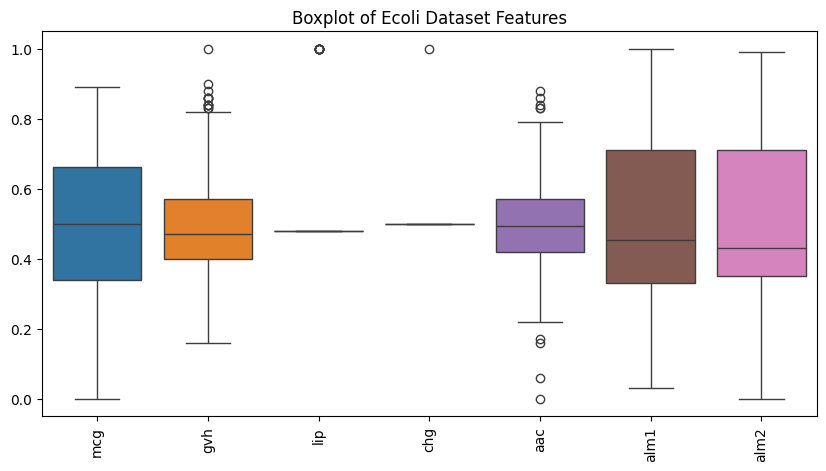

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ecoli_data.drop(['class'], axis=1))
plt.title('Boxplot of Ecoli Dataset Features')
plt.xticks(rotation=90)
plt.show()

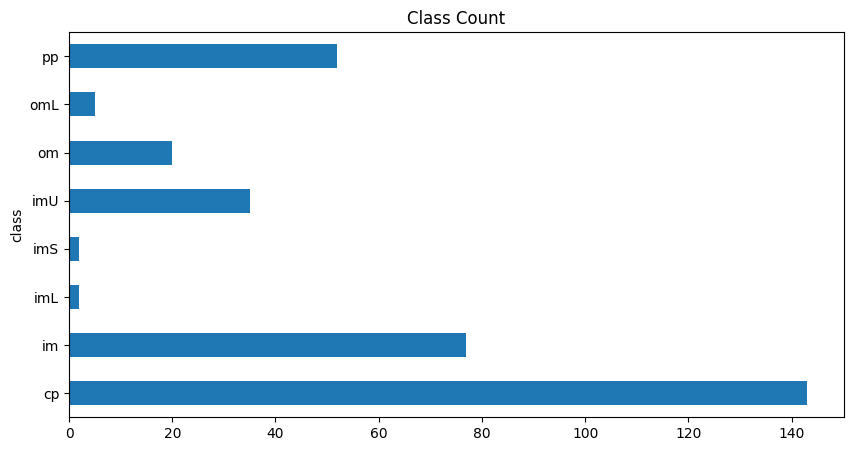

In [5]:
plt.figure(figsize=(10,5))
ecoli_data.groupby('class').size().plot(kind='barh')
plt.title('Class Count')
plt.show()

##### Data Preprocessing

In [6]:
# drop kolom sequence_name karena nama tidak mempengaruhi kelas
ecoli_data.drop(['sequence_name'], axis=1, inplace=True)

In [7]:
# drop kolom lip dan chg karena terlihat pada boxplot tidak memberikan kontribusi signifikan terhadap prediksi label
ecoli_data.drop(['lip', 'chg'], axis=1, inplace=True)

In [8]:
# membagi data fitur dan class
X = ecoli_data.drop(['class'], axis=1)
y = ecoli_data['class']

##### Data Splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Metode yang Digunakan

K-Nearest Neighbors (KNN) adalah algoritma yang digunakan untuk tugas klasifikasi dan regresi data berdasarkan beberapa data tetangga yang terdekat. Algoritma ini bekerja dengan mengidentifikasi k-nearest neighbors (k tetangga terdekat) dari sampel data yang ingin diklasifikasikan, kemudian prediksi kelas ditentukan dengan melihat kelas mayoritas dari tetangga-tetangga.

**Parameter yang Digunakan**

**Jumlah Tetangga (k)**: Jumlah tetangga terdekat yang diambil.

Nilai k yang sangat penting untuk akurasi algoritma KNN, karena nilai k yang terlalu kecil akan membuat model yang sangat sensitif terhadap noise, dan nilai k terlalu besar akan membuat model dapat kehilangan detail penting dalam data.

Dalam tugas ini, akan dicoba menggunakan beberapa nilai k yaitu, 1, 5, 9, 13, dan 17.

##### Experiment Settings

In [11]:
models = []

# parameter yang dicoba
K_coba = [1, 5, 9, 13, 17]

for k in K_coba:
  knn = KNeighborsClassifier(n_neighbors=k)
  models.append(knn)


##### Model Training


In [12]:
for knn in models:
  knn.fit(X_train, y_train)

##### Model Testing and Evaluation

In [13]:
performances = []
for i, knn in enumerate(models):
  y_pred = knn.predict(X_test)
  performances.append({
      "k": K_coba[i],
      "Akurasi": accuracy_score(y_test, y_pred)
  })

In [14]:
perf = pd.DataFrame(performances)
perf

,k,Akurasi
0,1,0.794118
1,5,0.867647
2,9,0.911765
3,13,0.897059
4,17,0.867647


#### Hasil dan Analisis



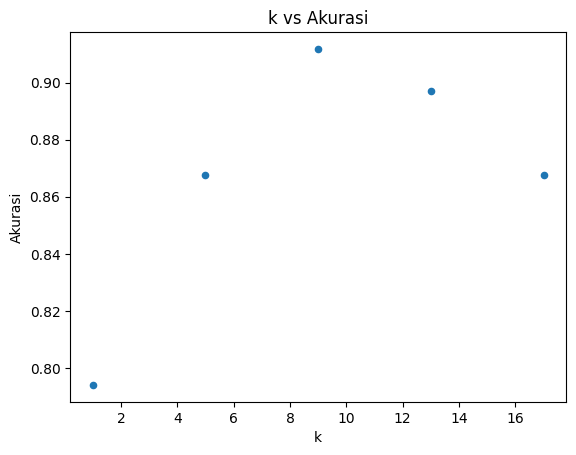

In [15]:
perf.plot(kind='scatter', x='k', y='Akurasi')
plt.title('k vs Akurasi')
plt.show()

Dari hasil evaluasi dan analisis menggunakan metrik akurasi, dapat disimpulkan bahwa KNN dengan nilai k = 9 memiliki akurasi tertinggi dengan nilai 0,91. Saat nilai k dicoba menggunakan nilai lebih kecil atau lebih besar, akurasi model menjadi menurun. Hal ini menunjukkan bahwa menggunakan sembilan tetangga terdekat memberikan hasil yang paling akurat dalam kasus ini. Namun, perlu diingat bahwa hasil ini hanya berdasarkan pada analisis terbatas pada dataset yang digunakan dalam tugas ini.

Dalam pemilihan nilai k pada algoritma kNN, perlu mempertimbangkan karakteristik dataset dan kasus yang sedang dianalisis. Nilai k yang terlalu kecil dapat menyebabkan overfitting, model menjadi terlalu kaku dan sulit beradaptasi dengan data baru. Sementara itu, nilai k yang terlalu besar dapat menyebabkan underfitting, model menjadi terlalu sederhana dan kehilangan kemampuan untuk menangkap pola yang kompleks dalam data.



#### Kesimpulan
Dataset E. coli adalah kumpulan data pengukuran sifat-sifat kimiawi dari berbagai strain bakteri E. coli. Tujuan dari tugas ini adalah untuk mengklasifikasikan strain E. coli berdasarkan beberapa fitur kimiawi yang diukur. Dataset ini terdiri dari 336 data protein E.coli dan dideskripsikan dengan tujuh variabel input yang berupa pengukuran urutan asam amino dari protein. Pada dataset ini kita membagi menjadi dua bagian yaitu data training dan testing. Dengan persentase data, 80% untuk training dan 20% untuk testing. Pada bagian pengolahan data kita melakukan beberapa langkah seperti Load Dataset ecoli, Data Prepocessing, dan Data Splitting. Pada dataset ini kita menggunakan metode KNN. K-Nearest Neighbors (KNN) adalah algoritma yang digunakan untuk tugas klasifikasi dan regresi data berdasarkan beberapa data tetangga yang terdekat. Untuk menggunakan metode KNN kita melakukan beberapa langkah dalam pengerjaannya yaitu Experiment Settings, Model Training, Model Testing and Evaluation. Dengan menggunakan metode KNN dapat memberikan hasil yang cukup baik untuk klasifikasi E. coli, dengan akurasi tertinggi 0.911765 pada k=9.